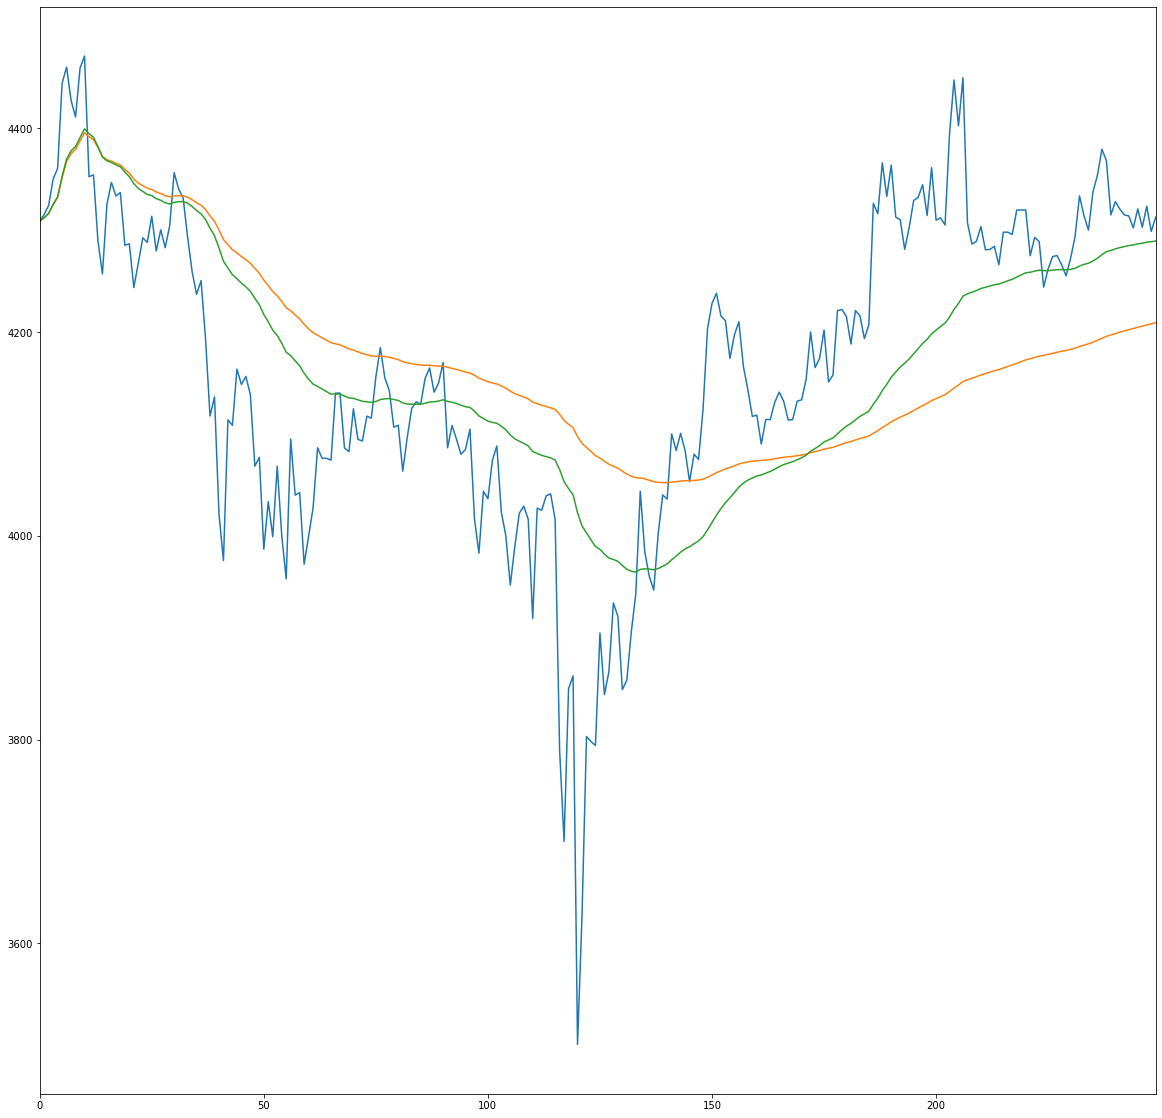

In [31]:
#!/usr/bin/env python3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,20)

def loadcsv(filename):
    df = pd.read_csv(filename)
    return df

def ema(df, column="close", period=100):
    emadata = df[column].ewm(period).mean()
    #emadata.plot()
    return emadata


df = loadcsv("BTCUSDT-1h-data.csv")
df["close"].head(250).plot()
ema(df).head(250).plot()
ema(df, period=30).head(250).plot()


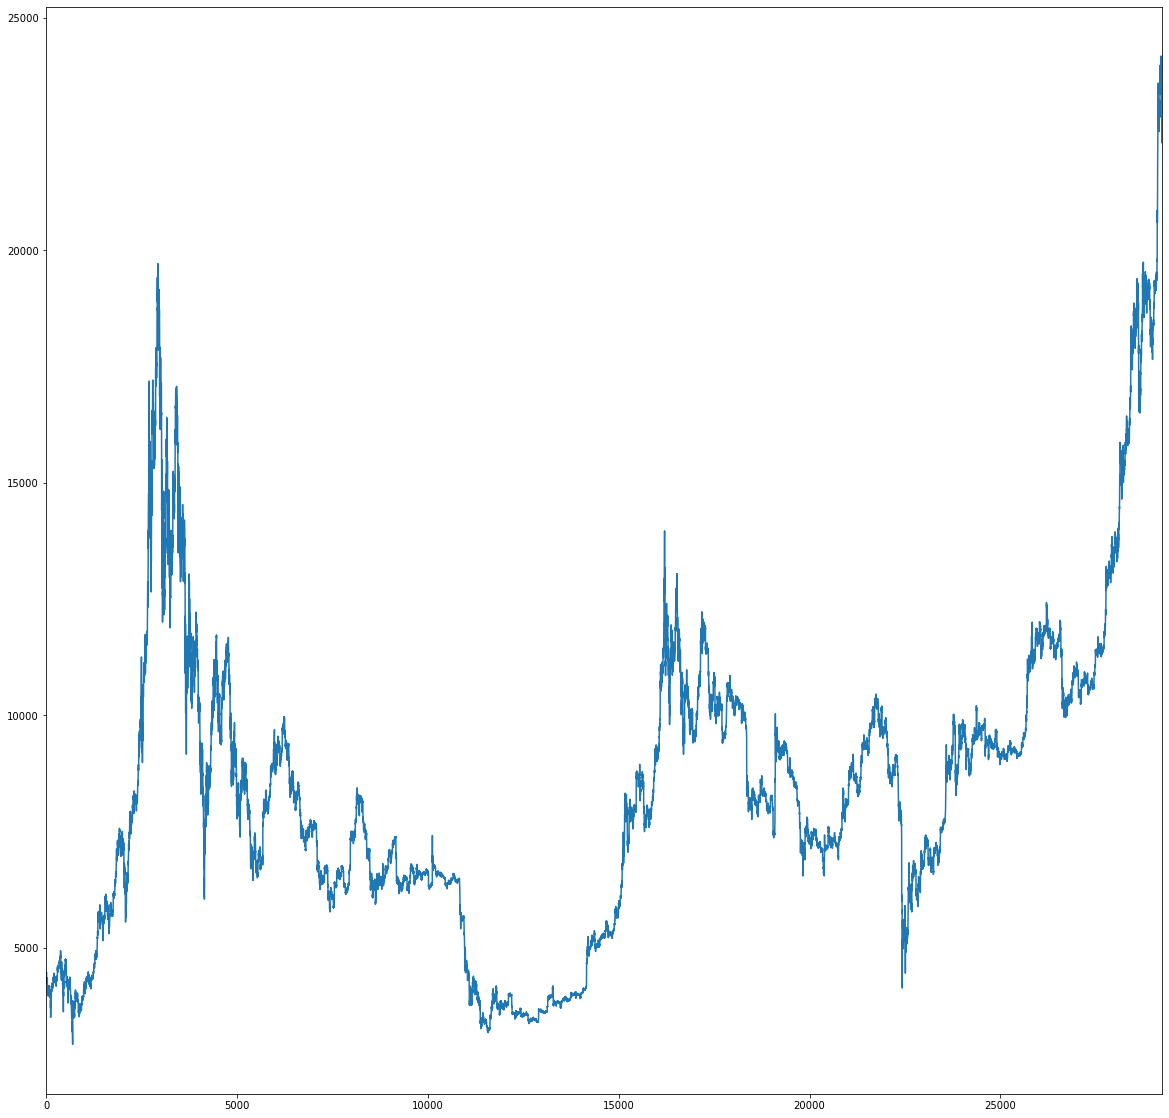

In [32]:
#!/usr/bin/env python3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,20)

def loadcsv(filename):
    df = pd.read_csv(filename)
    return df

def ema(df, column="close", period=30):
    df[column].ewm(period).mean().plot()


df = loadcsv("BTCUSDT-1h-data.csv")
#ema(df)
df["close"].plot()

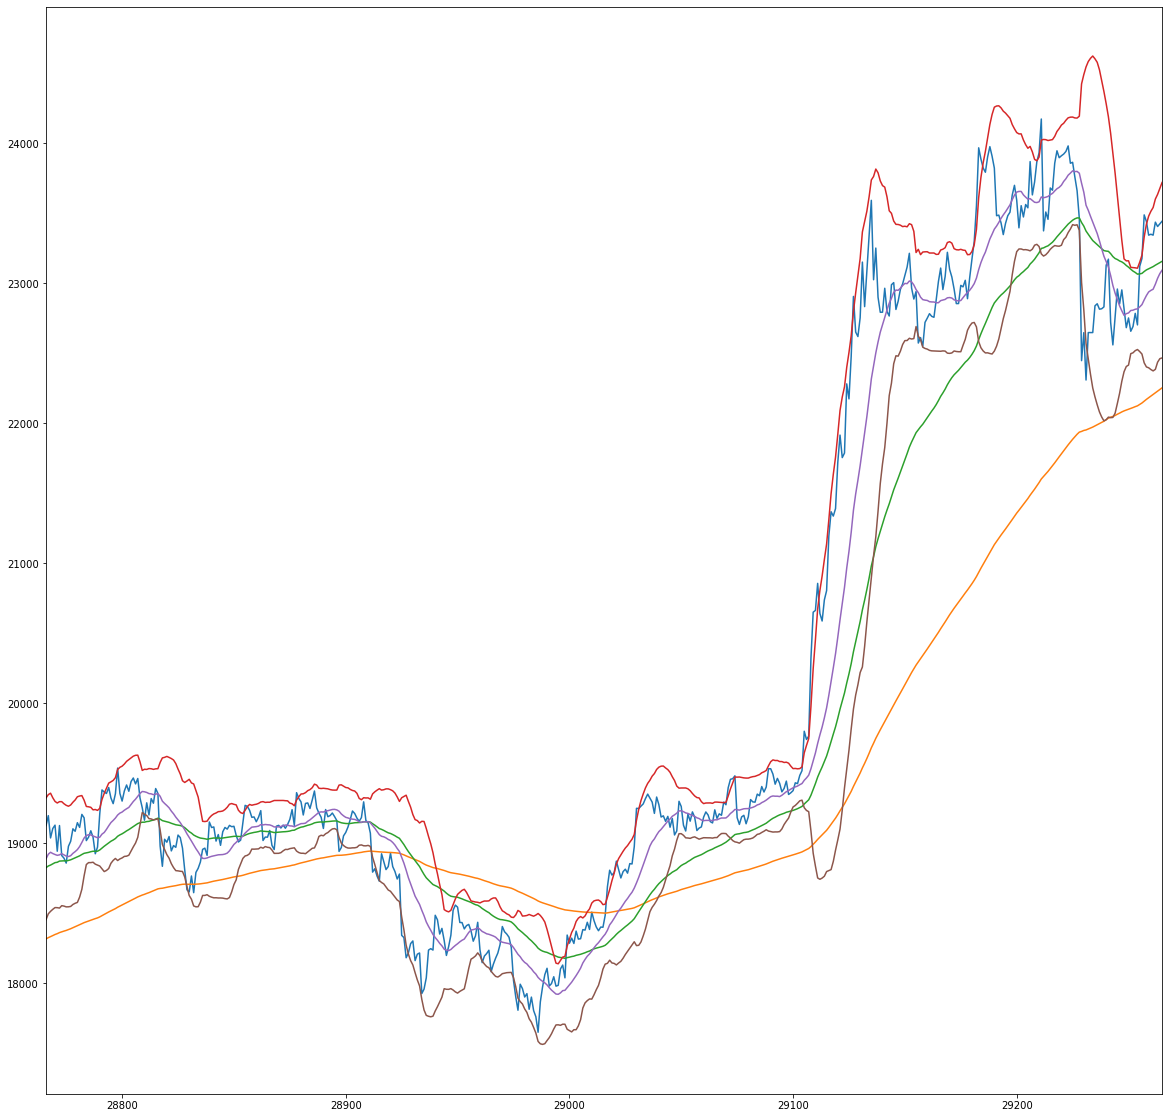

In [26]:
#!/usr/bin/env python3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

plt.rcParams["figure.figsize"] = (20,20)

# nn inputs
# [fastema-slowema,rsi,price vs bbands]

def loadcsv(filename):
    df = pd.read_csv(filename)
    return df

def ema(df, column="close", period=100):
    ema = df[column].ewm(period).mean()
    #emadata.plot()
    return ema

def rsi(df, column="close", period=30):
    # pylint: disable=no-member
    rsi = talib.RSI(df[column], timeperiod=period)
    return rsi

def bbands(df, column="close", period=20):
    # pylint: disable=no-member
    upperBB, middleBB, lowerBB = talib.BBANDS(df[column], timeperiod=period, nbdevup=2, nbdevdn=2, matype=0)
    return [upperBB,middleBB,lowerBB]

if __name__ == "__main__":
    df = loadcsv("BTCUSDT-1h-data.csv")
    datapoints = 500
    df["close"].tail(datapoints).plot()
    ##print(ema(df))
    ##print(df)
    ema(df).tail(datapoints).plot()
    ema(df, period=30).tail(datapoints).plot()
    #rsi(df).head(200).plot()
    for i in bbands(df):
        i.tail(datapoints).plot()
    
    #print(talib.get_functions())
    #print(talib.get_function_groups())

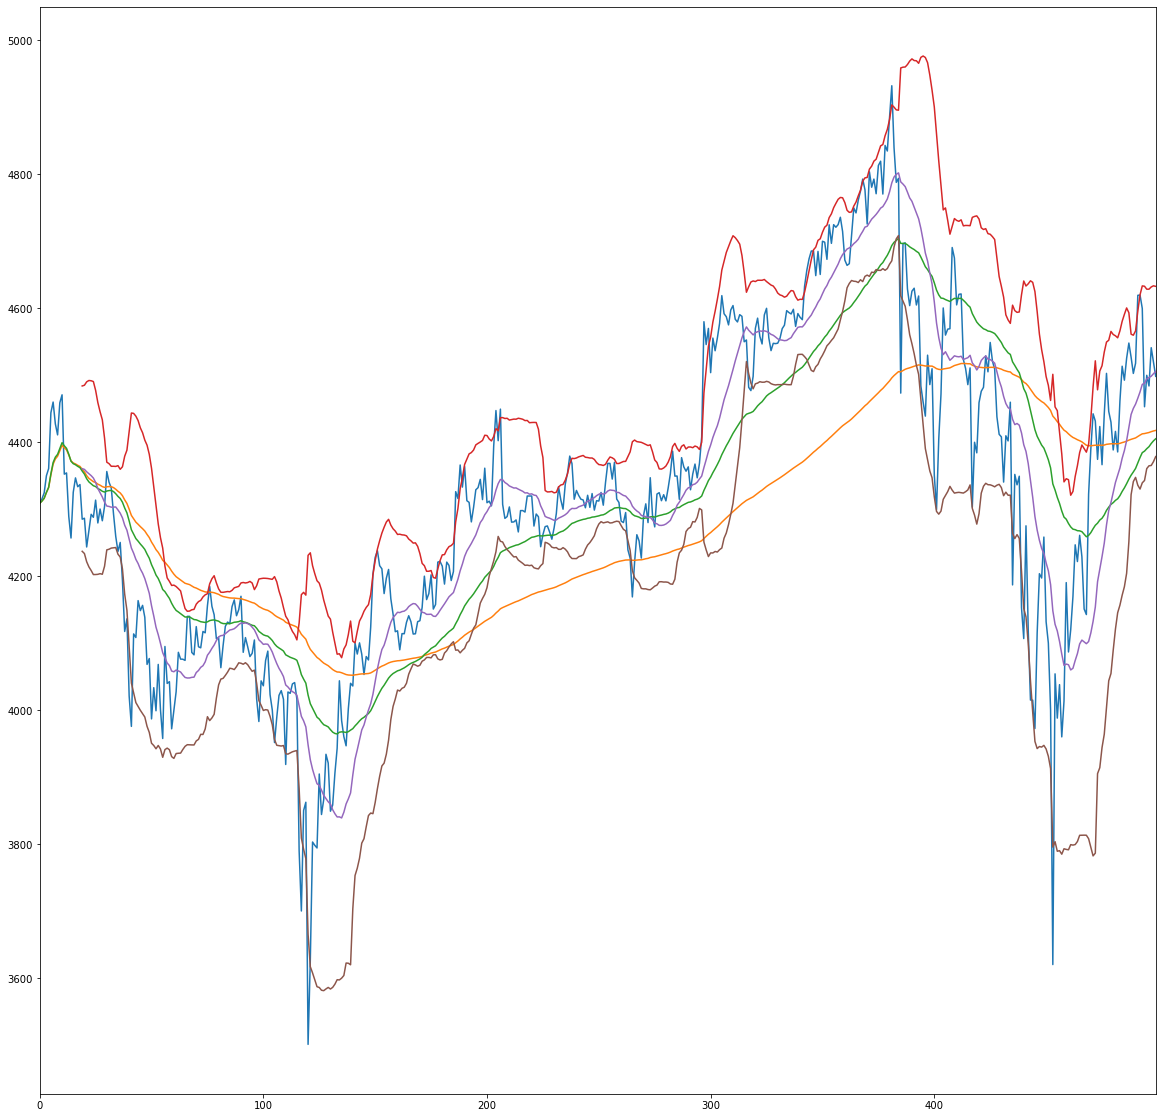

In [36]:
#!/usr/bin/env python3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

"""
    ===Ta-Lib Install===
    Links:
        https://visualstudio.microsoft.com/visual-cpp-build-tools/
        https://github.com/afnhsn/TA-Lib_x64
        https://github.com/mrjbq7/ta-lib/issues/127#issuecomment-280222942

    1. Install Visual C++ Build Tools
    2. DL afnhsn/TA-Lib_x64/TA-Lib_x64.zip (disregard exe)
    3. Move the "TA-Lib_x64.zip/TA-Lib_x64/ta-lib" folder to C:\
    4. Open Developer Command Prompt for VS[2019]
    5. CD to C:\ta-lib\c\make\cdr\win32\msvc
    6. Build the Library with: nmake
    7. pip install ta-lib

"""


plt.rcParams["figure.figsize"] = (20,20)

# nn inputs
# [fastema-slowema,rsi,price vs bbands]

def loadcsv(filename):
    df = pd.read_csv(filename)
    return df

def ema(df, column="close", period=100):
    ema = df[column].ewm(period).mean()
    #emadata.plot()
    return ema

def macd(df, column="close", period=100):
    ema_short = df[column].ewm(period).mean()
    ema_long = df[column].ewm(period).mean()

    

def rsi(df, column="close", period=30):
    # pylint: disable=no-member
    rsi = talib.RSI(df[column], timeperiod=period)
    return rsi

def bbands(df, column="close", period=20):
    # pylint: disable=no-member
    # https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands
    upperBB, middleBB, lowerBB = talib.BBANDS(df[column], timeperiod=period, nbdevup=2, nbdevdn=2, matype=0)
    return [upperBB,middleBB,lowerBB]

def neuraldfinput(df, column="close"):
    slowemaS = ema(df,column)
    fastemaS = ema(df,column,period=30)
    rsiS = rsi(df)
    bbandsS = bbands(df,column)

    deltaemalist = []
    for i in range(len(slowemaS)):
        deltaemalist.append(fastemaS[i]-slowemaS[i])

    deltaemaS = pd.Series(deltaemalist)

    outputdf = pd.DataFrame(columns = ["close", "deltaema", "rsi", "upperbb", "middlebb", "lowerbb"])
    outputdf["close"],outputdf["deltaema"],outputdf["rsi"],outputdf["upperbb"],outputdf["middlebb"],outputdf["lowerbb"] = df[column],deltaemaS,rsiS,bbandsS[0],bbandsS[1],bbandsS[2]
    return outputdf


#tester fxns
def simpleplotter(datapoints=500):
    df = loadcsv("BTCUSDT-1h-data.csv")
    df["close"].head(datapoints).plot()
    ema(df).head(datapoints).plot()
    ema(df, period=30).head(datapoints).plot()
    #rsi(df).head(200).plot()
    for i in bbands(df):
        i.head(datapoints).plot()

def nndatatest():
    indf = loadcsv("BTCUSDT-1h-data.csv")
    outdf = neuraldfinput(indf)
    outdf.head(500).plot()
    return 0

if __name__ == "__main__":
    #nndatatest()
    simpleplotter()